# Depth sensitivity patterns
### Finding observations which show reasonable sensitivity to depth within the ice shelf

Sea level anomaly, velocity at mooring locations, time mean ice shelf melt (remote sensing?)

### Sea level anomaly

Check out sensitivity of SLA to depth
1. at end of 3rd day, defined at 4 points in open ocean
2. at end of 3rd day, defined for full open ocean
3. during 1 month, defined at 4 points
4. during 1 month, full open ocean

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from xmitgcm import open_mdsdataset
from MITgcmutils import rdmds

In [20]:
def depth_sens_plot(ds1,ds2):
    plt.figure(figsize=(15,6))

    cmax = np.max(np.abs(ds1.adxx_depth.values))
    
    plt.subplot(1,2,1)
    plt.pcolormesh(ds1.XC,ds1.YC,ds1.adxx_depth.isel(time=0),
                   vmin=-cmax, vmax=cmax,
                   cmap='BrBG_r')
    plt.colorbar()
    plt.contour(ds1.XC,ds1.YC,ds1.Depth,colors='0.5')
    
    cmax = np.max(np.abs(ds2.adxx_depth.values))
    
    plt.subplot(1,2,2)
    plt.pcolormesh(ds2.XC,ds2.YC,ds2.adxx_depth.isel(time=0),
                   vmin=-cmax, vmax=cmax,
                   cmap='BrBG_r')
    plt.colorbar()
    plt.contour(ds2.XC,ds2.YC,ds2.Depth,colors='0.5')
    plt.show()
    
def double_sens_plot(x,y,fld1,fld2):
    plt.figure(figsize=(15,6))

    cmax = np.max(np.abs(fld1.values))
    
    plt.subplot(1,2,1)
    if 'time' in fld1.coords:
        fld1=fld1.isel(time=0)
    plt.pcolormesh(x,y,fld1,
                   vmin=-cmax, vmax=cmax,
                   cmap='BrBG_r')
    plt.colorbar()
    if 'Depth' in fld1.coords:
        plt.contour(x,y,fld1.Depth,colors='0.5')
    
    cmax = np.max(np.abs(fld2.values))
    
    plt.subplot(1,2,2)
    if 'time' in fld2.coords:
        fld2=fld2.isel(time=0)
    plt.pcolormesh(x,y,fld2,
                   vmin=-cmax, vmax=cmax,
                   cmap='BrBG_r')
    plt.colorbar()
    if 'Depth' in fld2.coords:
        plt.contour(x,y,fld2.Depth,colors='0.5')
    plt.show()
    

In [15]:
grid_dir = '/workspace/grids/pig_08'
ds_3day_mooring = open_mdsdataset(data_dir='/workspace/results/pig/bathy-eta-inversion/sensitivities/eta-3day-mooring',
                                  grid_dir=grid_dir,
                                  iters=0,
                                  geometry='sphericalpolar'
                                 )
ds_3day_ocean = open_mdsdataset(data_dir='/workspace/results/pig/bathy-eta-inversion/sensitivities/eta-3day-ocean',
                                  grid_dir=grid_dir,
                                  iters=0,
                                  geometry='sphericalpolar'
                                 )
ds_1mo_mooring = open_mdsdataset(data_dir='/workspace/results/pig/bathy-eta-inversion/sensitivities/eta-1mo-mooring',
                                  grid_dir=grid_dir,
                                  iters=0,
                                  geometry='sphericalpolar'
                                 )
ds_1mo_ocean = open_mdsdataset(data_dir='/workspace/results/pig/bathy-eta-inversion/sensitivities/eta-1mo-ocean',
                                  grid_dir=grid_dir,
                                  iters=0,
                                  geometry='sphericalpolar'
                                 )

/workspace/xmitgcm/xmitgcm/mds_store.py:812: UserWarning: Couldn't find available_diagnostics.log in /workspace/results/pig/bathy-eta-inversion/sensitivities/eta-3day-mooring. Using default version.
  "in %s. Using default version." % data_dir)
/workspace/xmitgcm/xmitgcm/mds_store.py:812: UserWarning: Couldn't find available_diagnostics.log in /workspace/results/pig/bathy-eta-inversion/sensitivities/eta-3day-ocean. Using default version.
  "in %s. Using default version." % data_dir)
/workspace/xmitgcm/xmitgcm/mds_store.py:812: UserWarning: Couldn't find available_diagnostics.log in /workspace/results/pig/bathy-eta-inversion/sensitivities/eta-1mo-mooring. Using default version.
  "in %s. Using default version." % data_dir)
/workspace/xmitgcm/xmitgcm/mds_store.py:812: UserWarning: Couldn't find available_diagnostics.log in /workspace/results/pig/bathy-eta-inversion/sensitivities/eta-1mo-ocean. Using default version.
  "in %s. Using default version." % data_dir)


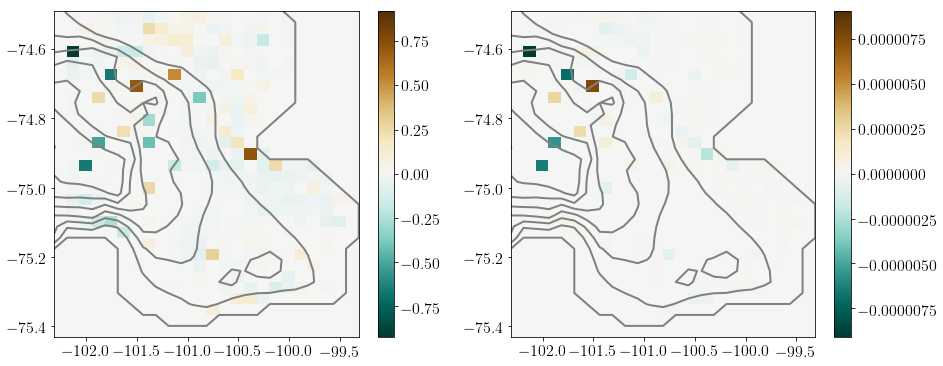

In [10]:
depth_sens_plot(ds_3day_mooring,ds_3day_ocean)
depth_sens_plot(ds_1mo_mooring,ds_1mo_ocean)

Note the bottom left figure was computed using a more realistic observational setup, based on squared misfit, with weights etc.

/workspace/xmitgcm/xmitgcm/mds_store.py:812: UserWarning: Couldn't find available_diagnostics.log in /workspace/results/pig/bathy-eta-inversion/sensitivities/eta-1mo-mooring-prior. Using default version.
  "in %s. Using default version." % data_dir)
/workspace/xmitgcm/xmitgcm/mds_store.py:812: UserWarning: Couldn't find available_diagnostics.log in /workspace/results/pig/bathy-eta-inversion/sensitivities/eta-1mo-1mooring-prior. Using default version.
  "in %s. Using default version." % data_dir)


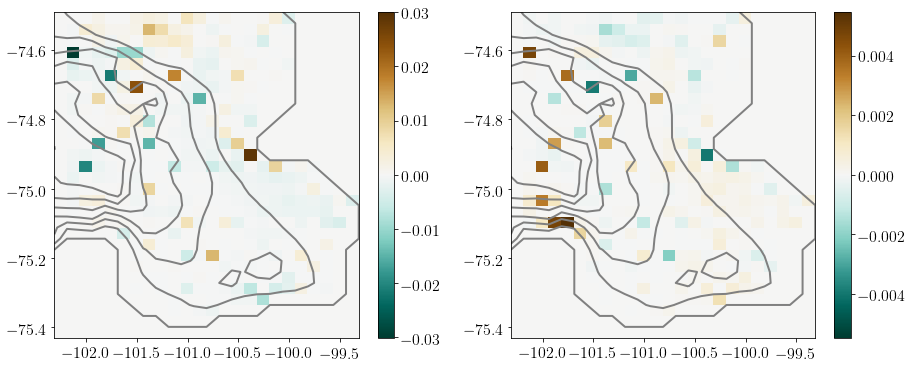

In [11]:
ds_iter0 = open_mdsdataset(data_dir='/workspace/results/pig/bathy-eta-inversion/sensitivities/eta-1mo-mooring-prior',
                           grid_dir=grid_dir,
                           iters=0,
                           geometry='sphericalpolar'
                          )
ds_iter0_1mooring=open_mdsdataset(data_dir='/workspace/results/pig/bathy-eta-inversion/sensitivities/eta-1mo-1mooring-prior',
                                  grid_dir=grid_dir,
                                  iters=0,
                                  geometry='sphericalpolar'
                                 )
depth_sens_plot(ds_iter0,ds_iter0_1mooring)

The left plot is sensitivity after 3 year spinup, with prior guess that bathymetric ridge is removed.

The right is the same, but with only one mooring at the outflow.

In [21]:
ds_adxx_all = open_mdsdataset(
    data_dir='/workspace/results/pig/bathy-eta-inversion/sensitivities/eta-1mo-mooring-all-ctrls-diags/',
    grid_dir=grid_dir,
    iters=0)
ds_diag = open_mdsdataset(
    data_dir='/workspace/results/pig/bathy-eta-inversion/sensitivities/eta-1mo-mooring-all-ctrls-diags/diags',
    grid_dir=grid_dir)

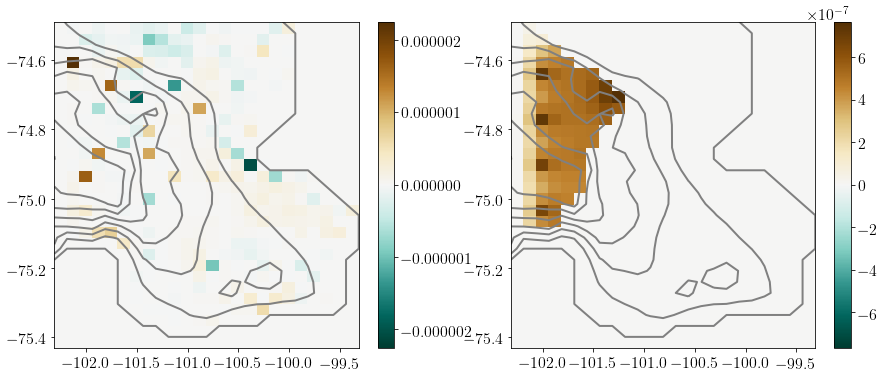

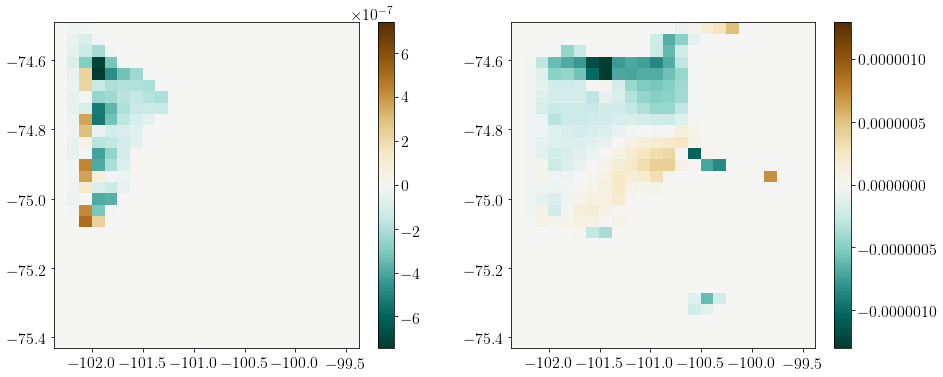

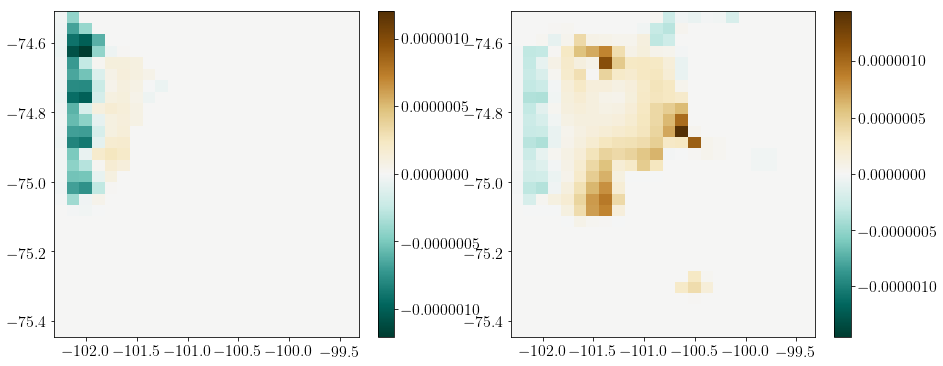

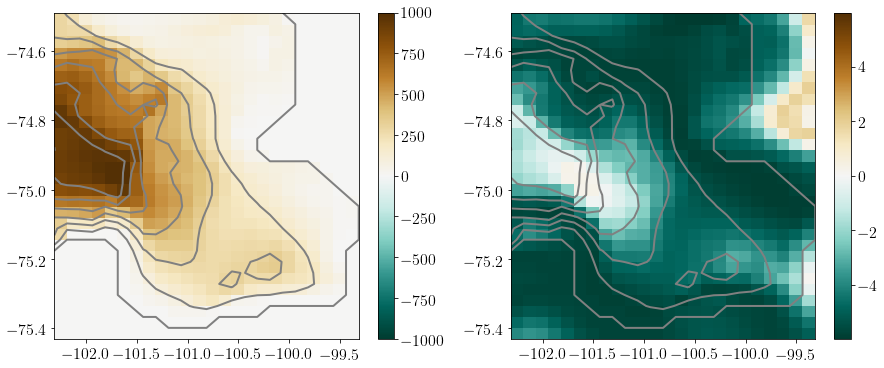

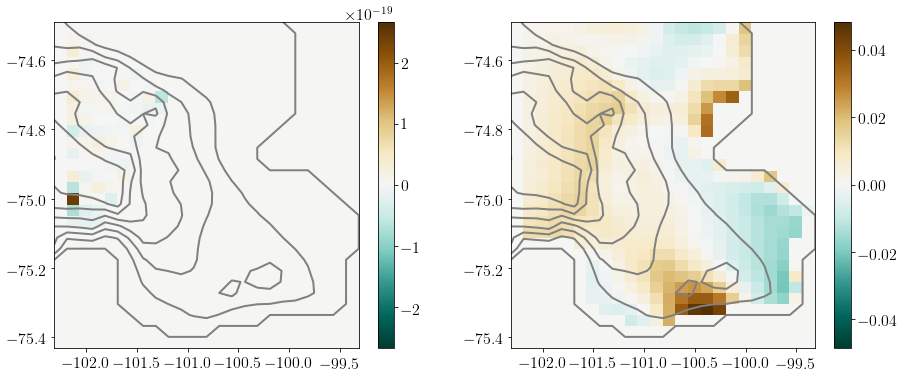

In [22]:
xc=ds_adxx_all.XC
yc=ds_adxx_all.YC
xg=ds_adxx_all.XG
yg=ds_adxx_all.YG
double_sens_plot(xc,yc,ds_adxx_all.adxx_depth,ds_adxx_all.adxx_theta.isel(Z=0))
double_sens_plot(xg,yc,ds_adxx_all.adxx_uvel.isel(Z=0),ds_adxx_all.adxx_uvel.isel(Z=20))
double_sens_plot(xc,yg,ds_adxx_all.adxx_vvel.isel(Z=0),ds_adxx_all.adxx_vvel.isel(Z=20))
double_sens_plot(xc,yc,ds_diag.Depth,ds_diag.PHIBOT)
double_sens_plot(xc,yc,ds_diag.WVELMASS,ds_diag.ETAN)

### Ice shelf FWF

Pretending like this is from e.g. remote sensing data

/workspace/xmitgcm/xmitgcm/mds_store.py:812: UserWarning: Couldn't find available_diagnostics.log in /workspace/results/pig/time-mean-obj-08/3mo/shelfice-obj/. Using default version.
  "in %s. Using default version." % data_dir)
/workspace/xmitgcm/xmitgcm/mds_store.py:812: UserWarning: Couldn't find available_diagnostics.log in /workspace/results/pig/time-mean-obj-08/3mo/eta-mooring-obj. Using default version.
  "in %s. Using default version." % data_dir)


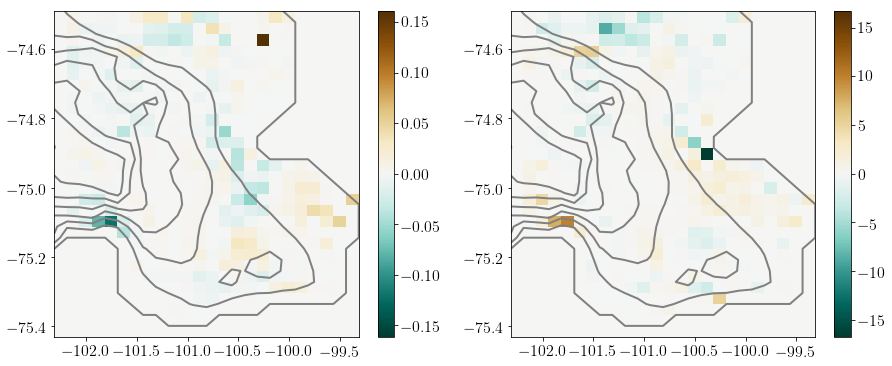

In [23]:
ds_fwf_1mo = open_mdsdataset(data_dir='/workspace/results/pig/time-mean-obj-08/3mo/shelfice-obj/',
                             grid_dir=grid_dir,
                             iters=0
                            )
ds_fwf_3mo = open_mdsdataset(data_dir='/workspace/results/pig/time-mean-obj-08/3mo/eta-mooring-obj',
                             grid_dir=grid_dir,
                             iters=0
                            )
depth_sens_plot(ds_fwf_1mo,ds_fwf_3mo)